# Linear Algebra for Machine Learning

Linear algebra is the language of machine learning.

Everything in ML can be reduced to:
- Vectors
- Dot products
- Matrix multiplication
- Transformations of space

This notebook builds geometric intuition and connects it directly to ML.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

# 1. Vectors & Geometry

A vector represents:
- A direction
- A magnitude
- A point in space

In ML:
- A data point is a vector
- Model weights are vectors

Intuition:
  <br/>
	•	Vector = arrow from origin
  <br/>
	•	Coordinates = how far you move in each dimension

In [7]:
# Creating Vectors

v = np.array([2, 3])
w = np.array([4, 1])

print("v =", v)
print("w =", w)

v = [2 3]
w = [4 1]


Visualize Vectors in 2D

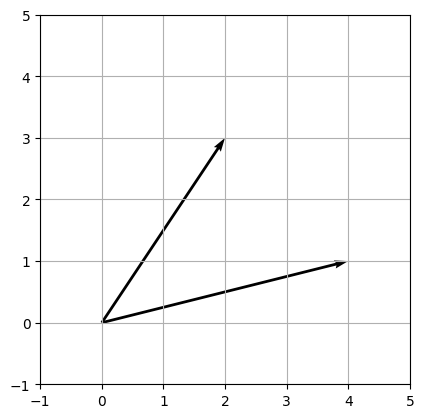

In [11]:
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

# 2. Dot Product (Vector)

Algebraic definition:

v · w = v₁w₁ + v₂w₂ + ... + vₙwₙ

Geometric definition:

v · w = ||v|| ||w|| cos(θ)

It measures:
	•	Similarity
	•	Alignment
	•	Projection

In [47]:
dot = np.dot(v, w)
print("Dot product:", dot)

Dot product: 11


What Does Dot Product Mean?
<br/><br/>
Interpretation:
  <br/>
	•	Dot > 0 → vectors point roughly same direction
  <br/>
	•	Dot = 0 → orthogonal (90°)
  <br/>
	•	Dot < 0 → opposite direction
<br/><br/>
Let’s compute angle:

In [58]:
norm_v = np.linalg.norm(v)
norm_w = np.linalg.norm(w)

cos_theta = dot / (norm_v * norm_w)
theta = np.arccos(cos_theta)

print("Angle (radians):", theta)
print("Angle (degrees):", np.degrees(theta))

Angle (radians): 0.7378150601204648
Angle (degrees): 42.27368900609373


# 3. Vector Addition

Geometrically:
You place one arrow at the tip of another.

In [59]:
v_plus_w = v + w
print("v + w =", v_plus_w)

v + w = [6 4]


# 4. Norms (Vector Length)

Norm = magnitude of vector

L2 Norm (Euclidean length):

||v|| = sqrt(v₁² + v₂²)

L1 Norm:

||v||₁ = |v₁| + |v₂|

🧠 Why Norm Matters in AI?
<br/>
	•	Regularization (L2)
  <br/>
	•	Distance calculation
  <br/>
	•	Feature scaling
  <br/>
	•	Loss magnitude

In [60]:
print("L2 norm:", np.linalg.norm(v))
print("L1 norm:", np.linalg.norm(v, ord=1))

L2 norm: 3.605551275463989
L1 norm: 5.0


# 5. Projection

Projection of w onto v:

proj_v(w) = (v·w / v·v) v

This is the foundation of least squares regression.

In [61]:
proj = (np.dot(v, w) / np.dot(v, v)) * v
print("Projection of w onto v:", proj)

Projection of w onto v: [1.6923 2.5385]


# 6. Matrix Multiplication (Core of Deep Learning)

Matrix multiplication = stacked dot products.

If A is (m×n) and x is (n×1):

Each row of A takes a dot product with x.

A matrix is:
  <br/>
	•	A transformation
  <br/>
	•	A way to rotate, scale, project vectors

In [62]:
A = np.array([
    [2, 1],
    [1, 3]
])

x = np.array([1, 2])

result = A @ x

print("A @ x =", result)

A @ x = [4 7]


🧠 What Just Happened?

Each row of matrix A:
  <br/>
	•	Took dot product with vector x

Matrix multiplication =
Multiple dot products stacked together.

That’s it.

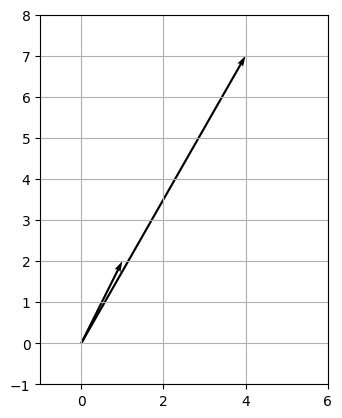

In [68]:
# Geometry of Matrix Multiplication

plt.figure()

# original vector
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1)

# transformed vector
plt.quiver(0, 0, result[0], result[1], angles='xy', scale_units='xy', scale=1)

plt.xlim(-1, 6)
plt.ylim(-1, 8)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

🧠 Matrix changed:
  <br/>
	•	Direction
  <br/>
	•	Magnitude

This is exactly what neural network layers do.

# 6. Eigenvalues & Eigenvectors

Definition:

A v = λ v

The vector does not change direction.
It only scales by λ.

In [69]:
eigvals, eigvecs = np.linalg.eig(A)

print("Eigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)

Eigenvalues:
 [1.382 3.618]

Eigenvectors:
 [[-0.8507 -0.5257]
 [ 0.5257 -0.8507]]


# 7. Singular Value Decomposition (SVD)

A = U Σ Vᵀ

- U → output directions
- Σ → scaling
- V → input directions

SVD works for any matrix.

In [70]:
U, S, Vt = np.linalg.svd(A)

print("Singular values:", S)

Singular values: [3.618 1.382]


# 8. PCA from Scratch

1. Center data
2. Compute covariance
3. Find eigenvectors
4. Project onto principal direction

In [71]:
np.random.seed(0)

X = np.random.randn(200, 2)
X[:, 1] = X[:, 0] * 0.8 + np.random.randn(200) * 0.2

X_centered = X - np.mean(X, axis=0)
cov = np.cov(X_centered.T)

eigvals, eigvecs = np.linalg.eig(cov)

principal_vector = eigvecs[:, np.argmax(eigvals)]

print("Principal direction:", principal_vector)

Principal direction: [0.7696 0.6386]


# Linear Algebra → Machine Learning

Linear Regression:
y = wᵀx

Neural Network Layer:
y = Wx + b

Regularization:
L2 = ||w||²
L1 = ||w||

🔥 ML Insight
  <br/>
	•	Linear regression = dot product
  <br/>
	•	Neural network neuron = dot product + bias
  <br/>
	•	Cosine similarity = normalized dot product

Everything reduces to:
- Dot products = similarity
- Matrix multiplication = transformation
- Vector norms or vector geometry = magnitude
- Eigenvectors = stable directions

<br/>
Neural networks = stacked linear algebra.